# IOT and Computer Vision Task 1:


## Color Identification in Images


### By N. SNEHA 

### Import modules: Pandas, Opencv

In [ ]:
import pandas as pd
import cv2

### load the image and resize it (if required).

In [ ]:
img_path = r'src/colorpic.jpeg'
img = cv2.imread(img_path)
img = cv2.resize(img, (1000, 662))

###  syntax:
```
cv2.imread(path, flag)
```
#### loads the image and stores as 3-dimensional array (since colour is nothing but RGB value)
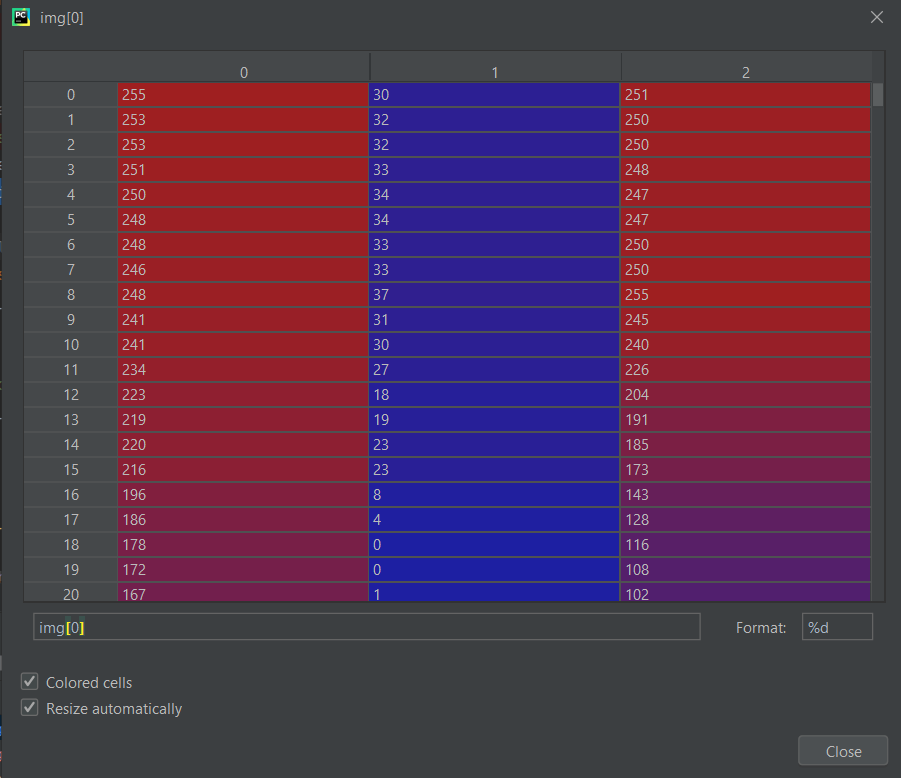


### declaring global variables (are used later on)

In [ ]:
clicked = False
r = g = b = x_pos = y_pos = 0

### Reading csv file with pandas and giving names to each column

In [ ]:
index = ["color", "color_name", "hex", "R", "G", "B"]
csv = pd.read_csv('colors.csv', names=index, header=None)

### The code in above cell assigns the index for each columns 
### reads **CSV** file and stores it as Dataframe as shown below,
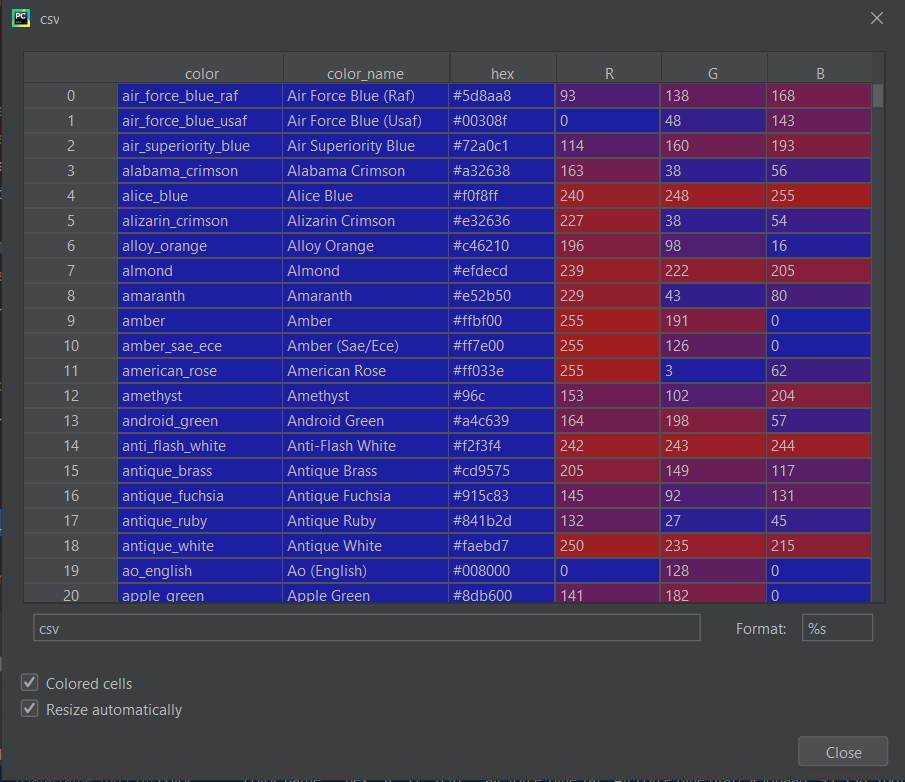

### function to calculate minimum distance from all colors and get the most matching color

In [ ]:
def get_color_name(R, G, B):
    minimum = 1000
    for i in range(len(csv)):
        d = abs(R - int(csv.loc[i, "R"])) + abs(G - int(csv.loc[i, "G"])) + abs(B - int(csv.loc[i, "B"]))
        if d <= minimum:
            minimum = d
            cname = csv.loc[i, "color_name"]
    return cname

### function to get x,y coordinates of mouse double click

In [ ]:
def draw_function(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        global b, g, r, x_pos, y_pos, clicked
        clicked = True
        x_pos = x
        y_pos = y
        b, g, r = img[y, x] # at the co-ordinates [x,y], RGB value is found ,since every picture element(pixel) has differnt r,g,b values
        b = int(b)
        g = int(g)
        r = int(r)

In [ ]:
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_function) 

In [ ]:
while True:

    cv2.imshow("image", img)
    if clicked:

        # cv2.rectangle(image, start point, endpoint, color, thickness)-1 fills entire rectangle
        cv2.rectangle(img, (20, 20), (750, 60), (b, g, r), -1)

        # Creating text string to display( Color name and RGB values )
        text = get_color_name(r, g, b) + ' R=' + str(r) + ' G=' + str(g) + ' B=' + str(b)

        # cv2.putText(img,text,start,font(0-7),fontScale,color,thickness,lineType )
        cv2.putText(img, text, (50, 50), 2, 0.8, (255, 255, 255), 2, cv2.LINE_AA)

        # For very light colours we will display text in black colour
        if r + g + b >= 600:
            cv2.putText(img, text, (50, 50), 2, 0.8, (0, 0, 0), 2, cv2.LINE_AA)
        
        clicked = False

In [ ]:
    # Break the loop when user hits 'esc' key
    if cv2.waitKey(20) & 0xFF == 27:
        break

cv2.destroyAllWindows()